# Ocean Xplorer - Project 1

This is an examination of the underway data from the Ocean Xplorer Website, including the data that has been recorded for the past 24 and 48 hours.

In [1]:
import sys
print(sys.version)

# we are using python version 3.12.2


3.12.2 | packaged by conda-forge | (main, Feb 16 2024, 20:54:21) [Clang 16.0.6 ]


In [2]:
# downloading all libraries and dependencies -- use pip if not present

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.impute import SimpleImputer

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import fetch_openml
from sklearn.compose import make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn import set_config

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

import seaborn as sns


import warnings
warnings.filterwarnings('ignore')



## Graphs analyzed for the underway:
- Air Temperature against Time
- Sea Temperature against Time
- Humidity against Time
- Pressure against Time
- Sea Temperature against Air Temperature
- Sea Temperature against Pressure
- Sea Temperature against Humidity
- Air Temperature against Humidity
- Air Temperature against Pressure
- Humidity against Pressure
- Correlation Maps of the 4 variables against each other

## Examining Data for the last 24 hrs

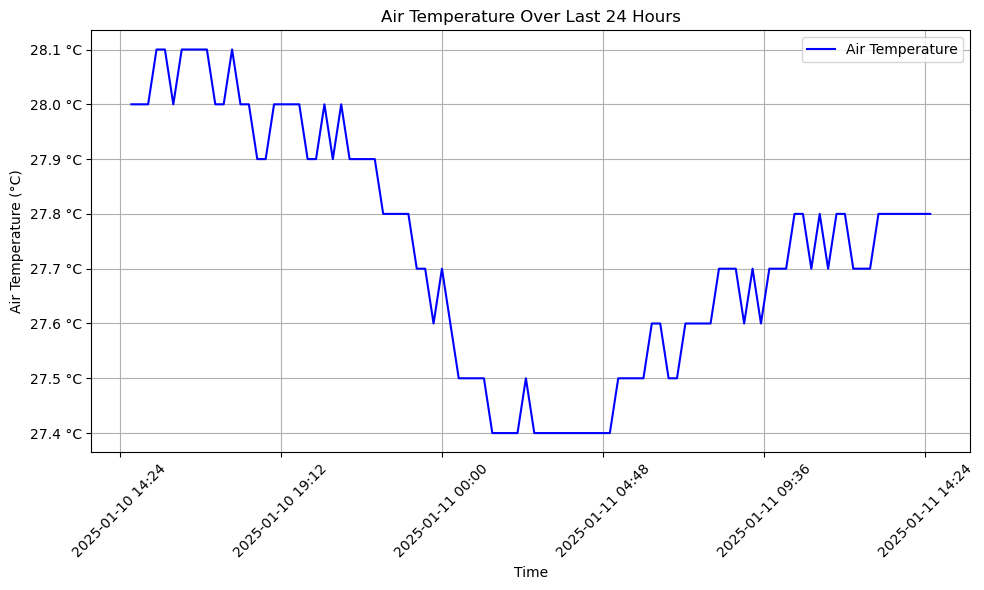

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

air_temperature_data = pd.read_csv("Datasets_24hrs/Air Temperature-data-2025-01-11 14_32_34.csv")

air_temperature_data['Time'] = pd.to_datetime(air_temperature_data['Time'])

air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temperature_data[
    'MwxStbdAirTemp stbd_mast_vaisala'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    air_temperature_data['Time'],
    air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'],
    label='Air Temperature',
    color='blue'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


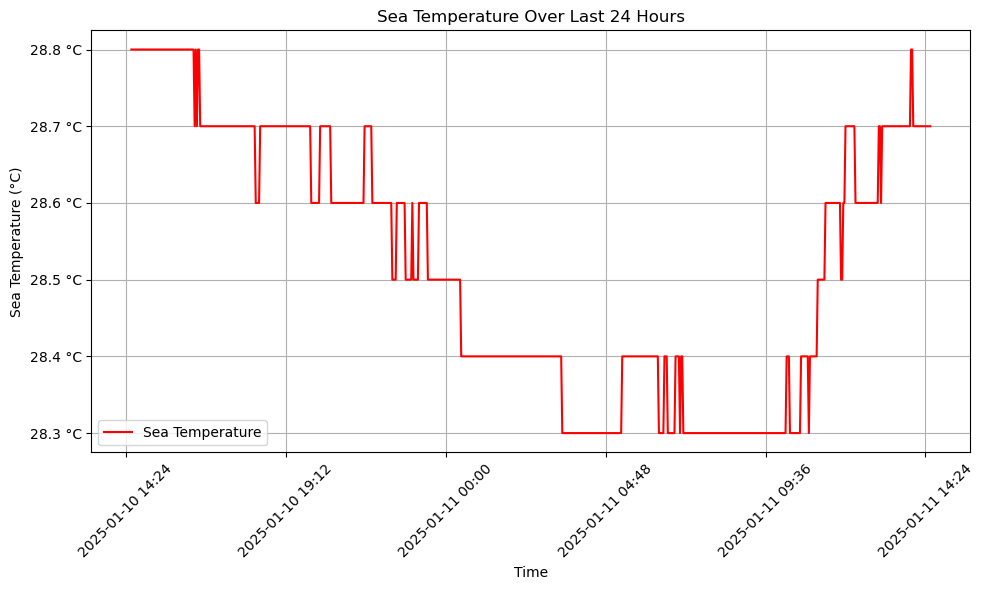

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

sea_temperature_data = pd.read_csv("Datasets_24hrs/Sea Temperature-data-2025-01-11 14_32_52.csv")

sea_temperature_data['Time'] = pd.to_datetime(sea_temperature_data['Time'])

sea_temperature_data['Temp bow_sbe45_tsg'] = sea_temperature_data[
    'Temp bow_sbe45_tsg'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    sea_temperature_data['Time'],
    sea_temperature_data['Temp bow_sbe45_tsg'],
    label='Sea Temperature',
    color='red'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Sea Temperature (°C)')
plt.title('Sea Temperature Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


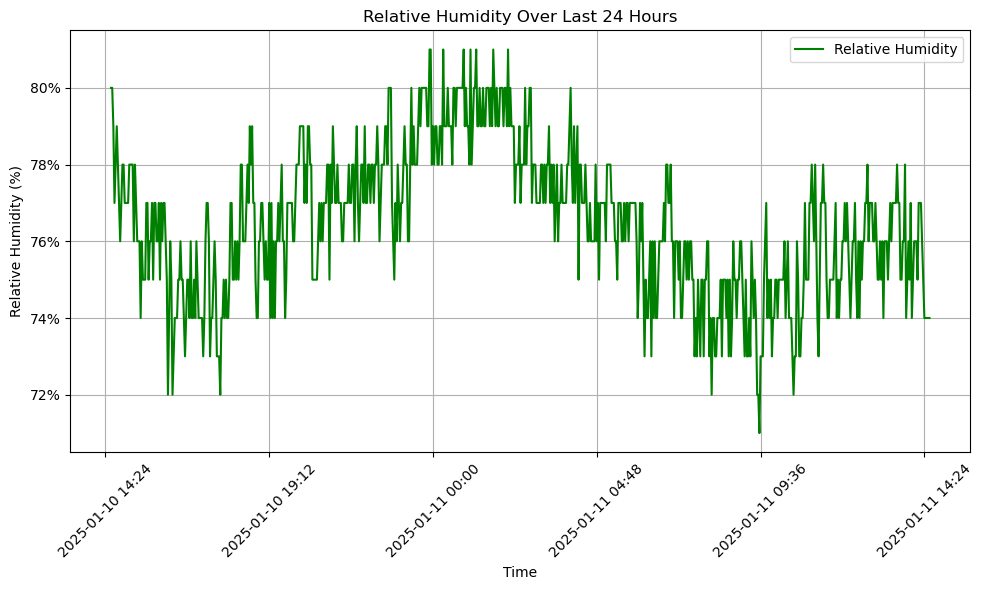

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

relative_humidity_data = pd.read_csv("Datasets_24hrs/Relative Humidity-data-2025-01-11 14_33_09.csv")

relative_humidity_data['Time'] = pd.to_datetime(relative_humidity_data['Time'])

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    relative_humidity_data['Time'],
    relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'],
    label='Relative Humidity',
    color='green'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))

plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


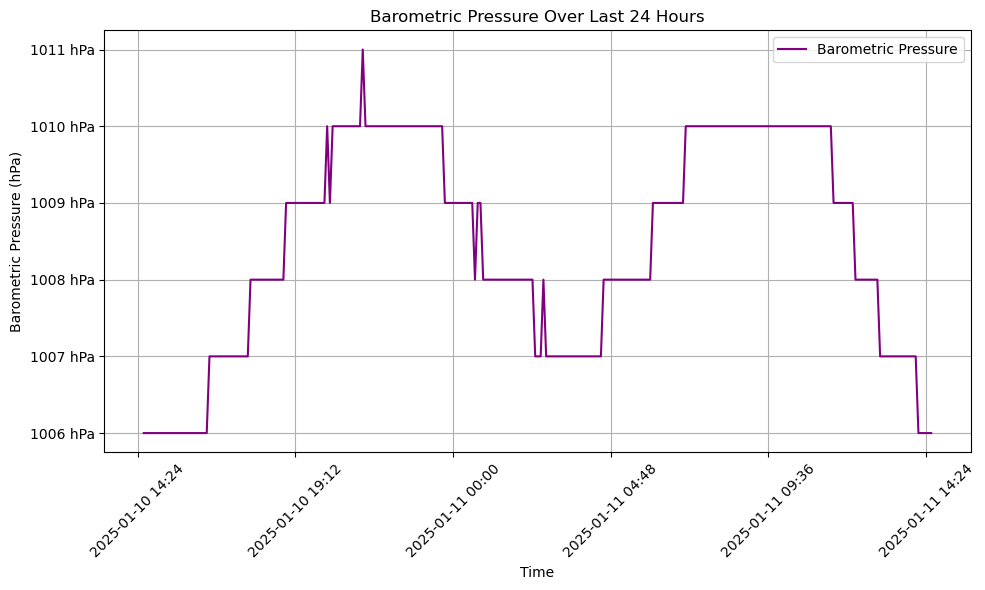

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

barometer_data = pd.read_csv("Datasets_24hrs/Barometer-data-2025-01-11 14_33_17.csv")

barometer_data['Time'] = pd.to_datetime(barometer_data['Time'])

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    barometer_data['Time'],
    barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'],
    label='Barometric Pressure',
    color='purple'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f hPa'))

plt.xlabel('Time')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure Over Last 24 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


## Examining Data for the last 48 hrs

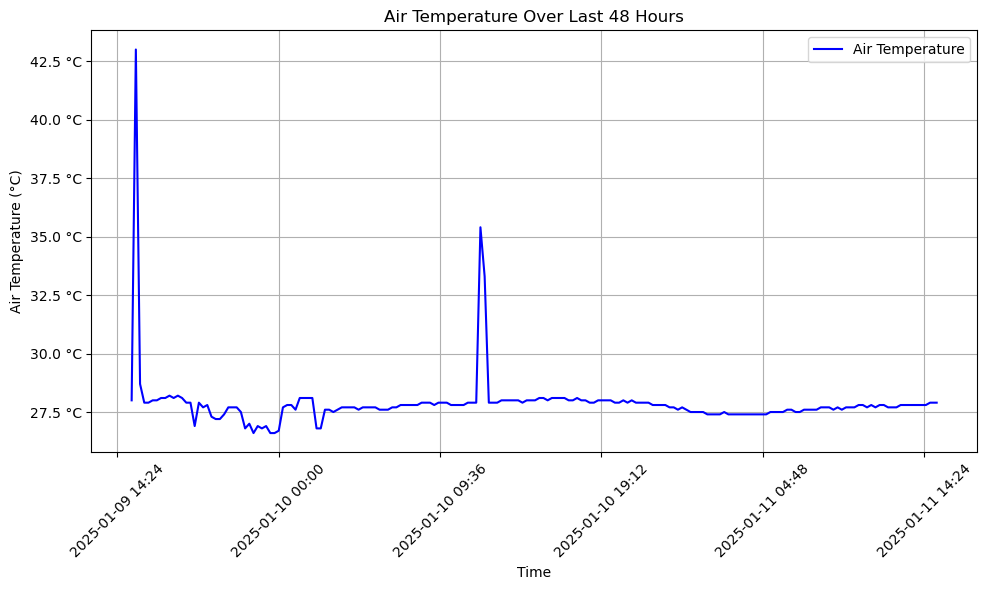

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

air_temperature_data = pd.read_csv("Datasets_48hrs/Air Temperature-data-2025-01-11 15_08_40.csv")

air_temperature_data['Time'] = pd.to_datetime(air_temperature_data['Time'])

air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temperature_data[
    'MwxStbdAirTemp stbd_mast_vaisala'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    air_temperature_data['Time'],
    air_temperature_data['MwxStbdAirTemp stbd_mast_vaisala'],
    label='Air Temperature',
    color='blue'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Air Temperature (°C)')
plt.title('Air Temperature Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


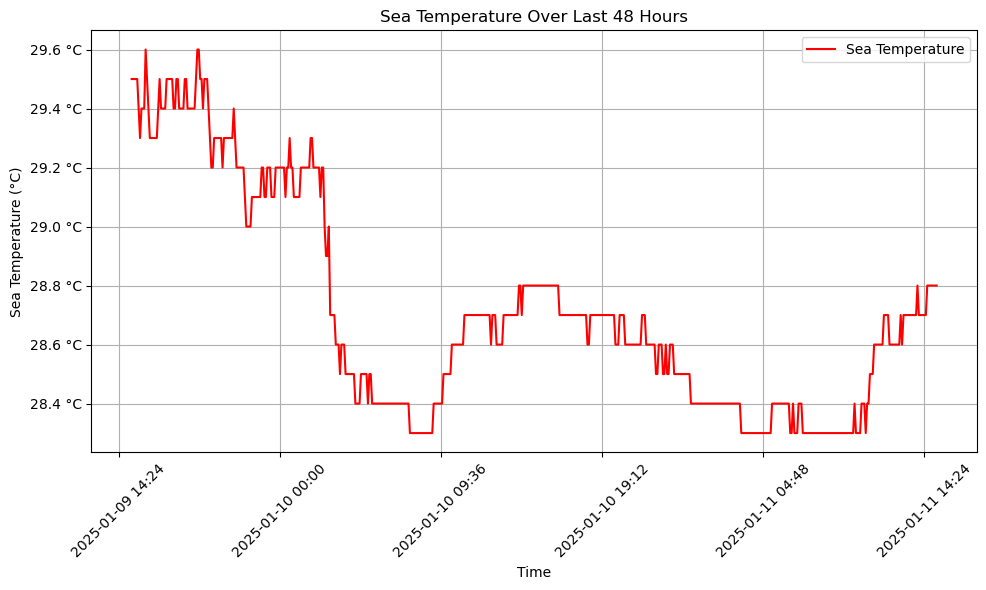

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

sea_temperature_data = pd.read_csv("Datasets_48hrs/Sea Temperature-data-2025-01-11 15_08_47.csv")

sea_temperature_data['Time'] = pd.to_datetime(sea_temperature_data['Time'])

sea_temperature_data['Temp bow_sbe45_tsg'] = sea_temperature_data[
    'Temp bow_sbe45_tsg'
].str.extract(r'(\d+\.\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    sea_temperature_data['Time'],
    sea_temperature_data['Temp bow_sbe45_tsg'],
    label='Sea Temperature',
    color='red'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.1f °C'))

plt.xlabel('Time')
plt.ylabel('Sea Temperature (°C)')
plt.title('Sea Temperature Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


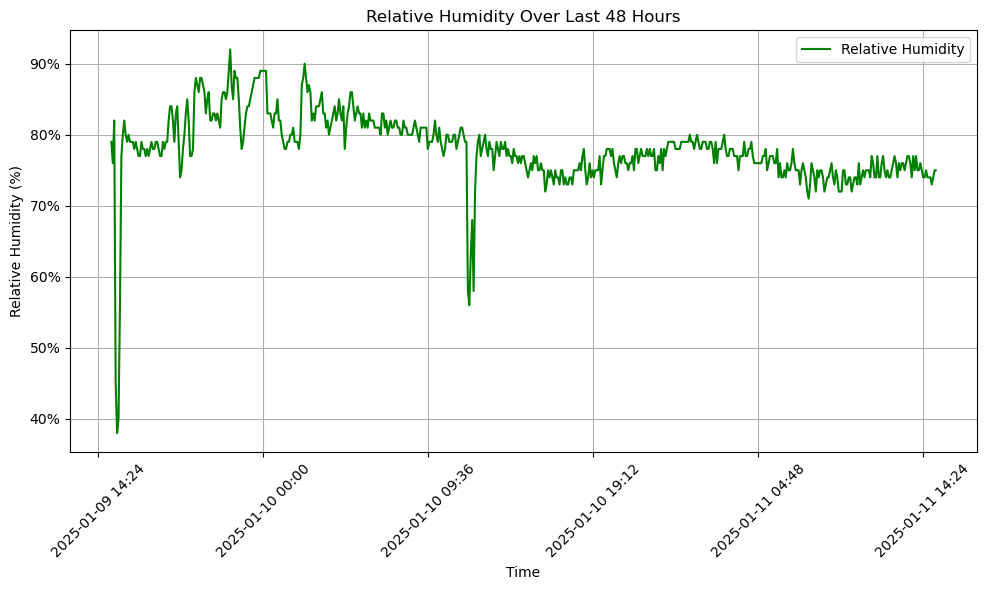

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

relative_humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")

relative_humidity_data['Time'] = pd.to_datetime(relative_humidity_data['Time'])

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)

relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = relative_humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    relative_humidity_data['Time'],
    relative_humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'],
    label='Relative Humidity',
    color='green'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f%%'))

plt.xlabel('Time')
plt.ylabel('Relative Humidity (%)')
plt.title('Relative Humidity Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


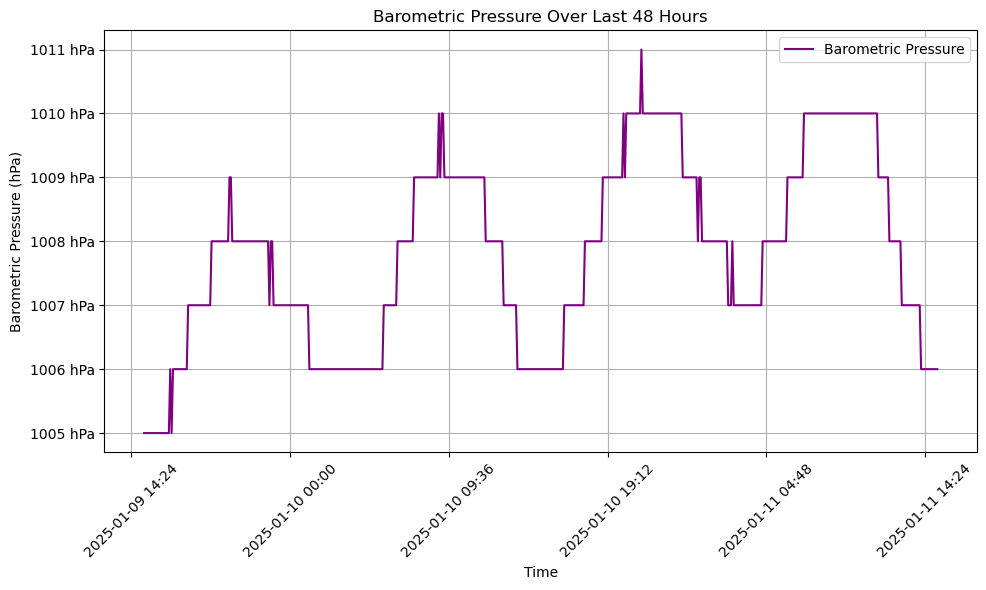

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import MaxNLocator, FormatStrFormatter

barometer_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

barometer_data['Time'] = pd.to_datetime(barometer_data['Time'])

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = barometer_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].str.extract(r'(\d+)').astype(float)

plt.figure(figsize=(10, 6))
plt.plot(
    barometer_data['Time'],
    barometer_data['MwxStbdBarometricPressure stbd_mast_vaisala'],
    label='Barometric Pressure',
    color='purple'
)

plt.gca().xaxis.set_major_locator(MaxNLocator(nbins=7))
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.xticks(rotation=45)

plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.0f hPa'))

plt.xlabel('Time')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


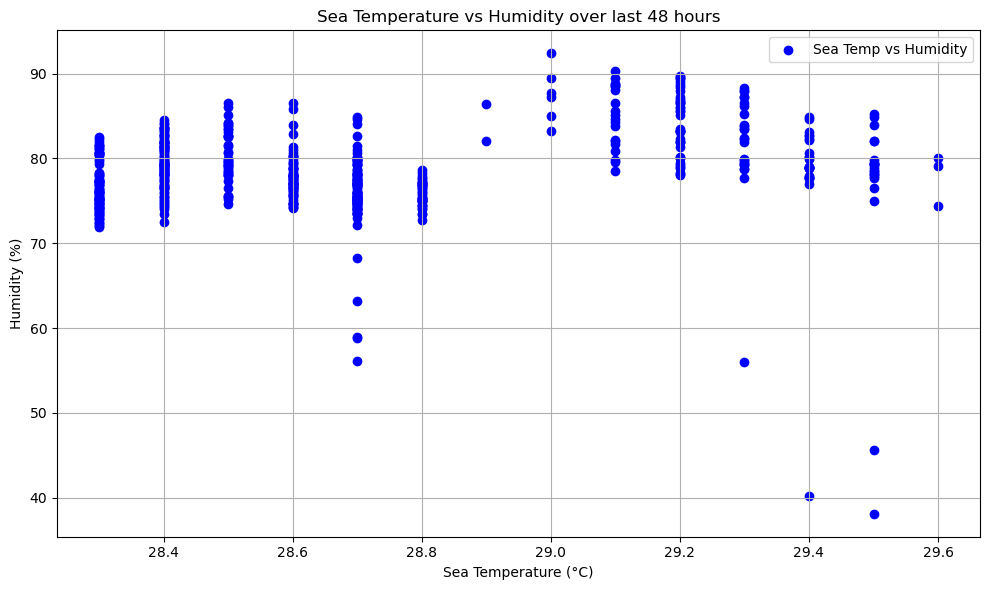

In [11]:
# testing the relationship between different variables - eg sea temperature against humidity

import pandas as pd
import matplotlib.pyplot as plt

humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")
sea_temp_data = pd.read_csv("Datasets_48hrs/Sea Temperature-data-2025-01-11 15_08_47.csv")

humidity_data['Time'] = pd.to_datetime(humidity_data['Time'])
sea_temp_data['Time'] = pd.to_datetime(sea_temp_data['Time'])

humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)
sea_temp_data['Temp bow_sbe45_tsg'] = sea_temp_data['Temp bow_sbe45_tsg'].astype(str)

humidity_data['Humidity'] = humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
sea_temp_data['SeaTemperature'] = sea_temp_data['Temp bow_sbe45_tsg'].str.extract(r'(\d+\.\d+)').astype(float)

merged_data = pd.merge(humidity_data[['Time', 'Humidity']], sea_temp_data[['Time', 'SeaTemperature']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['SeaTemperature'], merged_data['Humidity'], color='blue', label='Sea Temp vs Humidity')

plt.xlabel('Sea Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Sea Temperature vs Humidity over last 48 hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


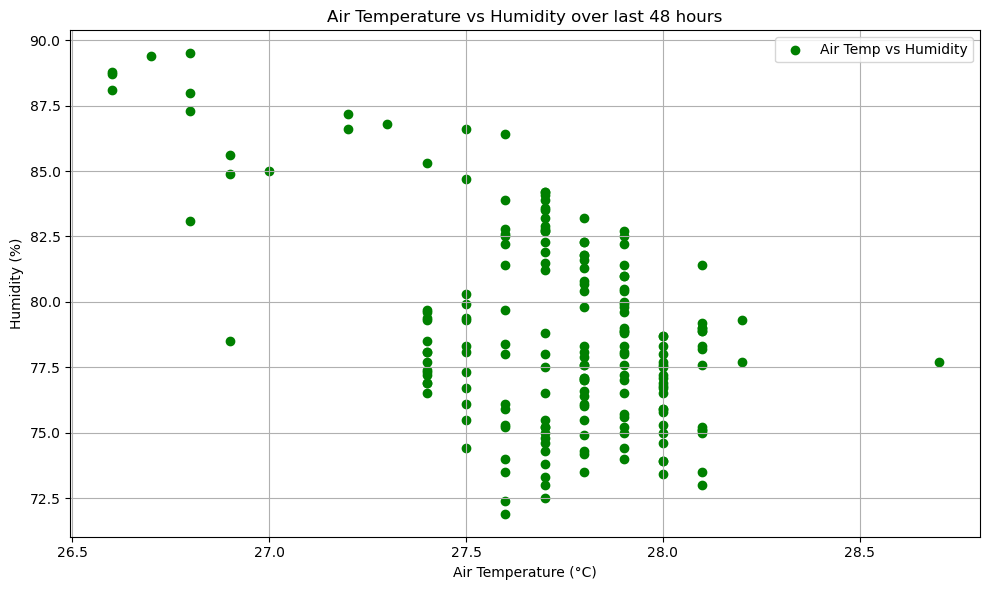

In [12]:
# testing the relationship between different variables - eg air temperature against humidity

import pandas as pd
import matplotlib.pyplot as plt

humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")
air_temp_data = pd.read_csv("Datasets_48hrs/Air Temperature modified.csv")

humidity_data['Time'] = pd.to_datetime(humidity_data['Time'])
air_temp_data['Time'] = pd.to_datetime(air_temp_data['Time'])

humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)
air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].astype(str)

humidity_data['Humidity'] = humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
air_temp_data['AirTemperature'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)

merged_data = pd.merge(humidity_data[['Time', 'Humidity']], air_temp_data[['Time', 'AirTemperature']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['AirTemperature'], merged_data['Humidity'], color='green', label='Air Temp vs Humidity')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.title('Air Temperature vs Humidity over last 48 hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


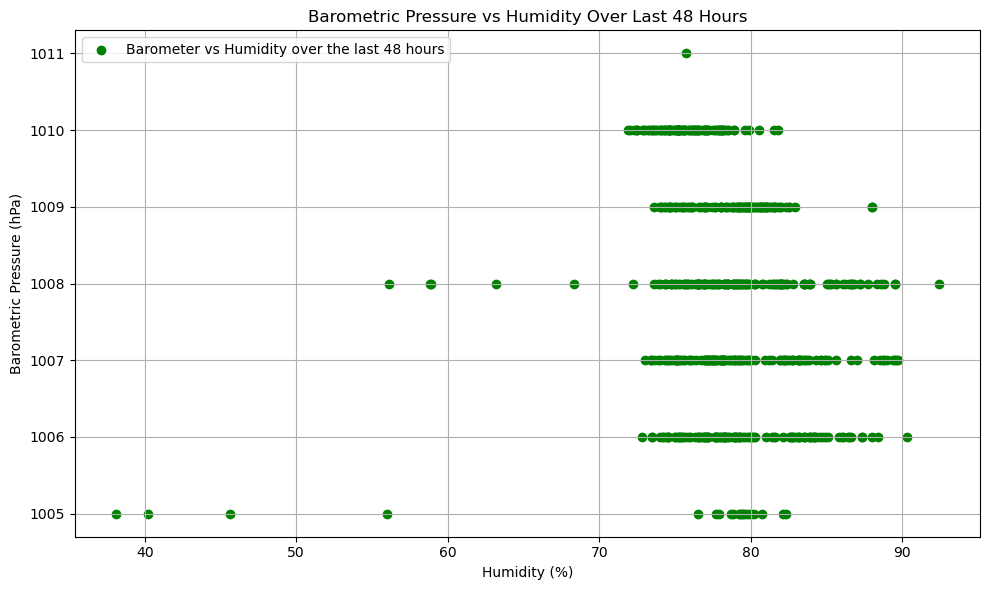

In [13]:
# testing the relationship between different variables - eg pressure against humidity

import pandas as pd
import matplotlib.pyplot as plt

humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")
pressure_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

humidity_data['Time'] = pd.to_datetime(humidity_data['Time'])
pressure_data['Time'] = pd.to_datetime(pressure_data['Time'])

humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'] = humidity_data[
    'MwxStbdRelativeHumidity stbd_mast_vaisala'
].astype(str)
pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = pressure_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

humidity_data['Humidity'] = humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
pressure_data['Barometer'] = pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'].str.extract(r'(\d+)').astype(float)

merged_data = pd.merge(humidity_data[['Time', 'Humidity']], pressure_data[['Time', 'Barometer']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Humidity'], merged_data['Barometer'], color='green', label='Barometer vs Humidity over the last 48 hours')

plt.xlabel('Humidity (%)')
plt.ylabel('Barometric Pressure (hPa)')
plt.title('Barometric Pressure vs Humidity Over Last 48 Hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()



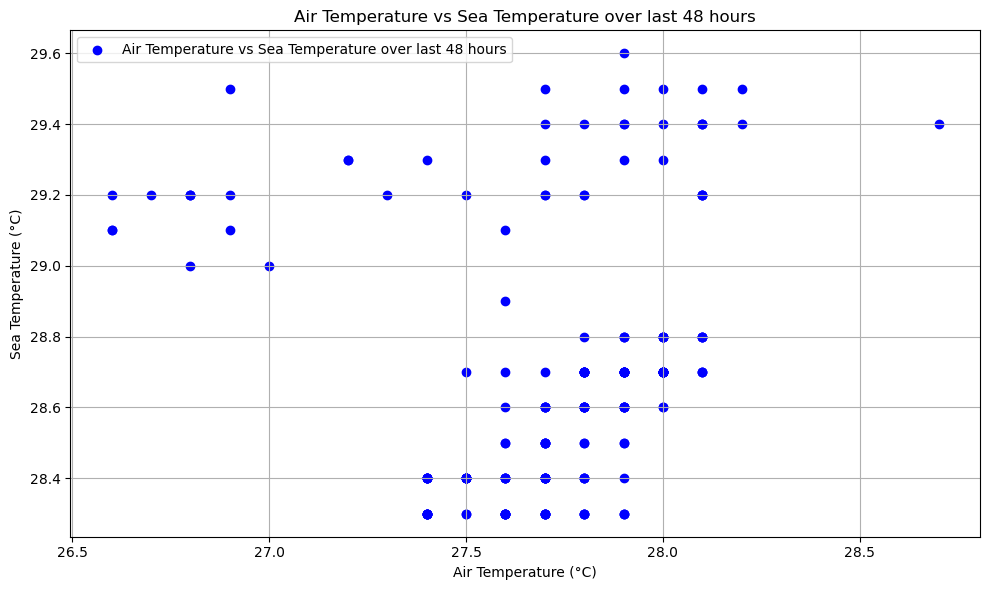

In [14]:
# testing the relationship between different variables - eg air temperature against sea temperature

import pandas as pd
import matplotlib.pyplot as plt

sea_temp_data = pd.read_csv("Datasets_48hrs/Sea Temperature-data-2025-01-11 15_08_47.csv")
air_temp_data = pd.read_csv("Datasets_48hrs/Air Temperature modified.csv")

sea_temp_data['Time'] = pd.to_datetime(sea_temp_data['Time'])
air_temp_data['Time'] = pd.to_datetime(air_temp_data['Time'])

sea_temp_data['Temp bow_sbe45_tsg'] = sea_temp_data['Temp bow_sbe45_tsg'].astype(str)
air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].astype(str)

sea_temp_data['SeaTemperature'] = sea_temp_data['Temp bow_sbe45_tsg'].str.extract(r'(\d+\.\d+)').astype(float)
air_temp_data['AirTemperature'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)

merged_data = pd.merge(sea_temp_data[['Time', 'SeaTemperature']], air_temp_data[['Time', 'AirTemperature']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['AirTemperature'], merged_data['SeaTemperature'], color='blue', label='Air Temperature vs Sea Temperature over last 48 hours')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Sea Temperature (°C)')
plt.title('Air Temperature vs Sea Temperature over last 48 hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


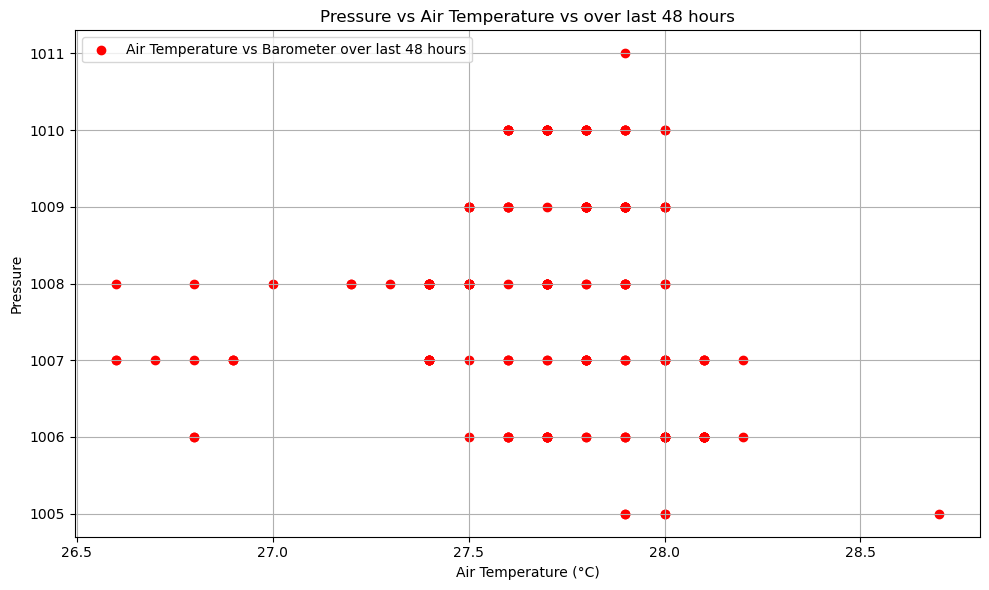

In [15]:
# testing the relationship between different variables - eg air temperature against pressure

import pandas as pd
import matplotlib.pyplot as plt

air_temp_data = pd.read_csv("Datasets_48hrs/Air Temperature modified.csv")
pressure_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

air_temp_data['Time'] = pd.to_datetime(air_temp_data['Time'])
pressure_data['Time'] = pd.to_datetime(pressure_data['Time'])

air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].astype(str)
pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = pressure_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

air_temp_data['AirTemperature'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
pressure_data['Barometer'] = pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'].str.extract(r'(\d+)').astype(float)

merged_data = pd.merge(air_temp_data[['Time', 'AirTemperature']], pressure_data[['Time', 'Barometer']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['AirTemperature'], merged_data['Barometer'], color='red', label='Air Temperature vs Barometer over last 48 hours')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Pressure')
plt.title('Pressure vs Air Temperature vs over last 48 hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


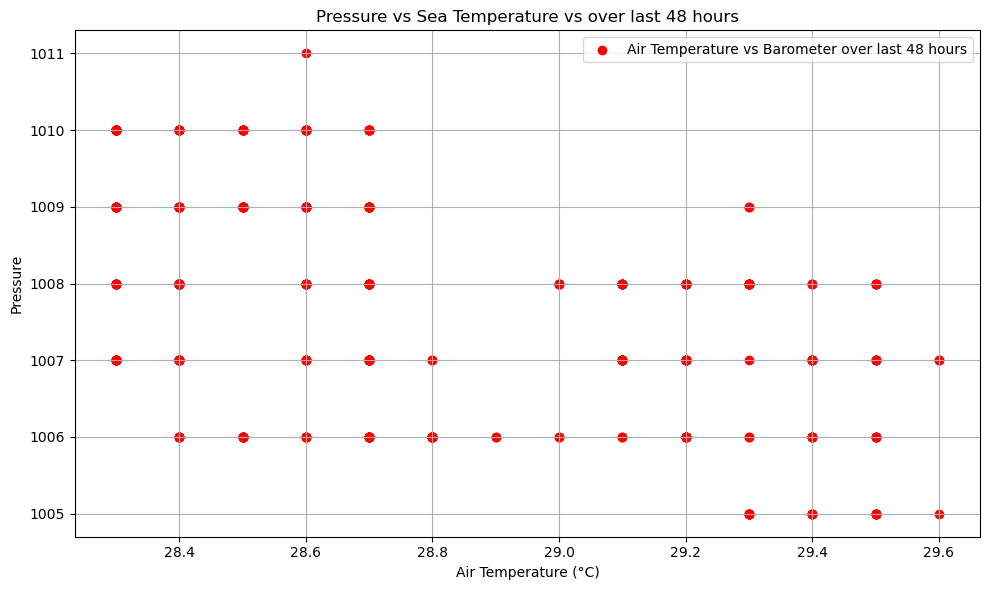

In [16]:
# testing the relationship between different variables - eg sea temperature against pressure

import pandas as pd
import matplotlib.pyplot as plt

sea_temp_data = pd.read_csv("Datasets_48hrs/Sea Temperature-data-2025-01-11 15_08_47.csv")
pressure_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

sea_temp_data['Time'] = pd.to_datetime(sea_temp_data['Time'])
pressure_data['Time'] = pd.to_datetime(pressure_data['Time'])

sea_temp_data['Temp bow_sbe45_tsg'] = sea_temp_data['Temp bow_sbe45_tsg'].astype(str)
pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'] = pressure_data[
    'MwxStbdBarometricPressure stbd_mast_vaisala'
].astype(str)

sea_temp_data['SeaTemperature'] = sea_temp_data['Temp bow_sbe45_tsg'].str.extract(r'(\d+\.\d+)').astype(float)
pressure_data['Barometer'] = pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'].str.extract(r'(\d+)').astype(float)

merged_data = pd.merge(sea_temp_data[['Time', 'SeaTemperature']], pressure_data[['Time', 'Barometer']], on='Time')

plt.figure(figsize=(10, 6))
plt.scatter(merged_data['SeaTemperature'], merged_data['Barometer'], color='red', label='Air Temperature vs Barometer over last 48 hours')

plt.xlabel('Air Temperature (°C)')
plt.ylabel('Pressure')
plt.title('Pressure vs Sea Temperature vs over last 48 hours')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.show()


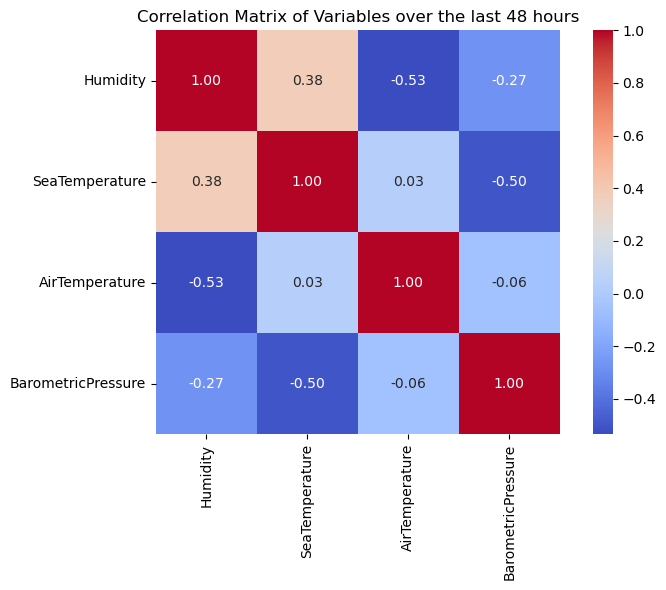

In [17]:
# examining the correlation betweent the different varibles over the last 48 hrs

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

humidity_data = pd.read_csv("Datasets_48hrs/Relative Humidity-data-2025-01-11 15_08_54.csv")
sea_temp_data = pd.read_csv("Datasets_48hrs/Sea Temperature-data-2025-01-11 15_08_47.csv")
air_temp_data = pd.read_csv("Datasets_48hrs/Air Temperature modified.csv")
pressure_data = pd.read_csv("Datasets_48hrs/Barometer-data-2025-01-11 15_09_01.csv")

humidity_data['Time'] = pd.to_datetime(humidity_data['Time'])
sea_temp_data['Time'] = pd.to_datetime(sea_temp_data['Time'])
air_temp_data['Time'] = pd.to_datetime(air_temp_data['Time'])
pressure_data['Time'] = pd.to_datetime(pressure_data['Time'])

humidity_data['Humidity'] = humidity_data['MwxStbdRelativeHumidity stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
sea_temp_data['SeaTemperature'] = sea_temp_data['Temp bow_sbe45_tsg'].str.extract(r'(\d+\.\d+)').astype(float)
air_temp_data['AirTemperature'] = air_temp_data['MwxStbdAirTemp stbd_mast_vaisala'].str.extract(r'(\d+\.\d+)').astype(float)
pressure_data['BarometricPressure'] = pressure_data['MwxStbdBarometricPressure stbd_mast_vaisala'].str.extract(r'(\d+)').astype(float)

merged_data = pd.merge(humidity_data[['Time', 'Humidity']], sea_temp_data[['Time', 'SeaTemperature']], on='Time')
merged_data = pd.merge(merged_data, air_temp_data[['Time', 'AirTemperature']], on='Time')
merged_data = pd.merge(merged_data, pressure_data[['Time', 'BarometricPressure']], on='Time')

correlation_matrix = merged_data[['Humidity', 'SeaTemperature', 'AirTemperature', 'BarometricPressure']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', cbar=True, square=True)
plt.title('Correlation Matrix of Variables over the last 48 hours')
plt.tight_layout()
plt.show()


## Data to be collected:
- Turbidity
- Fluorescense (Chlorophyll)



Chloropyhll to be calculated using the formula that we obtained from Hugh
To get Turbidity Data from Hugh